In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('product_sales.csv')

In [3]:
data

,Products_sold_milllions
0,15
1,20
2,16
3,13
4,18
5,14
6,15
7,17
8,20
9,20


In [4]:
data.index = data.index +1

In [5]:
data

,Products_sold_milllions
1,15
2,20
3,16
4,13
5,18
6,14
7,15
8,17
9,20
10,20


# Naive technique

In [6]:
naive = data.copy()

In [8]:
naive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 1 to 24
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Products_sold_milllions  24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


In [11]:
naive['Products_sold_milllions'] = naive['Products_sold_milllions'].shift(1)

In [12]:
naive

,Products_sold_milllions
1,NaN
2,15.0
3,20.0
4,16.0
5,13.0
6,18.0
7,14.0
8,15.0
9,17.0
10,20.0


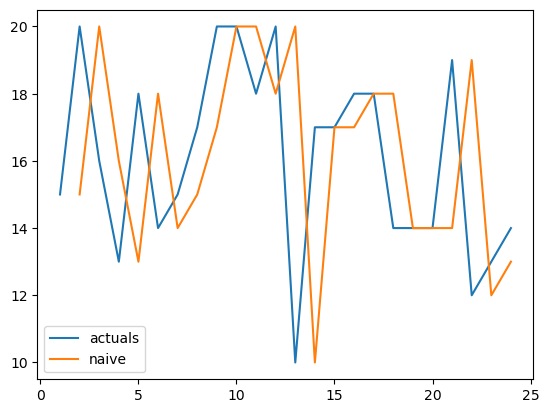

In [18]:
plt.plot(data.index, data['Products_sold_milllions'], label='actuals')
plt.plot(naive.index, naive['Products_sold_milllions'], label='naive')
plt.legend()

In [19]:
from sklearn.metrics import mean_absolute_error

In [22]:
mae_naive = mean_absolute_error( data.loc[2:,'Products_sold_milllions'],  naive.loc[2:,'Products_sold_milllions'])
print(mae_naive)

2.9130434782608696


# SMA
* Lag 1

In [25]:
#sma = data.copy()

In [26]:
sma = data.rolling(window=2).mean()

In [27]:
sma

,Products_sold_milllions
1,NaN
2,17.5
3,18.0
4,14.5
5,15.5
6,16.0
7,14.5
8,16.0
9,18.5
10,20.0


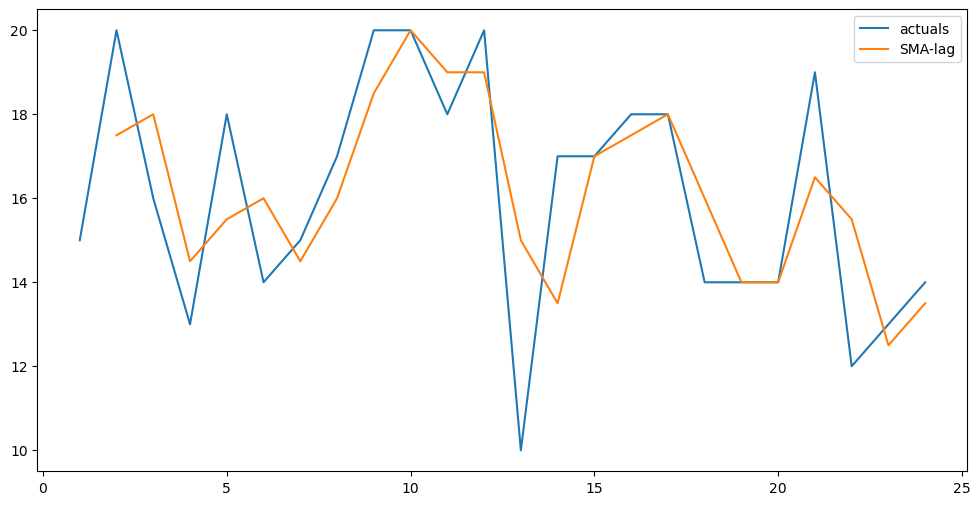

In [42]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Products_sold_milllions'], label='actuals')
plt.plot(sma.index, sma['Products_sold_milllions'], label='SMA-lag')
plt.legend()
plt.show()

In [29]:
mae_sma = mean_absolute_error( data.loc[2:,'Products_sold_milllions'],  sma.loc[2:,'Products_sold_milllions'])
print(mae_sma)

1.4565217391304348


* Lag 2

In [32]:
sma_2 = data.rolling(window=3).mean()

In [33]:
sma_2

,Products_sold_milllions
1,NaN
2,NaN
3,17.000000
4,16.333333
5,15.666667
6,15.000000
7,15.666667
8,15.333333
9,17.333333
10,19.000000


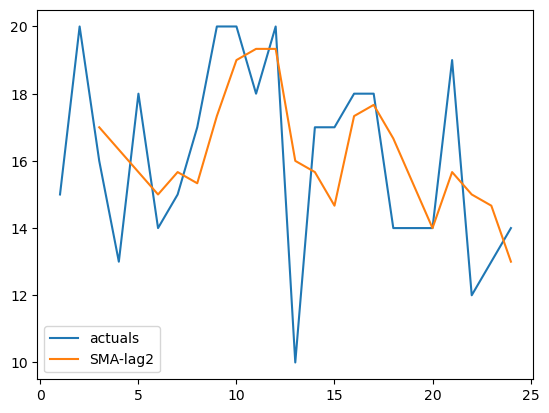

In [35]:
plt.plot(data.index, data['Products_sold_milllions'], label='actuals')
plt.plot(sma_2.index, sma_2['Products_sold_milllions'], label='SMA-lag2')
plt.legend()

In [39]:
mae_sma2 = mean_absolute_error( data.loc[3:,'Products_sold_milllions'],  sma_2.loc[3:,'Products_sold_milllions'])
print(mae_sma2)

1.787878787878788


##### MAE
* Naive = 2.91
* SMA lag1 = 1.45
* SMA_lag2 = 1.78

* SMA with lag1 is forecasting better than the other basic techniques

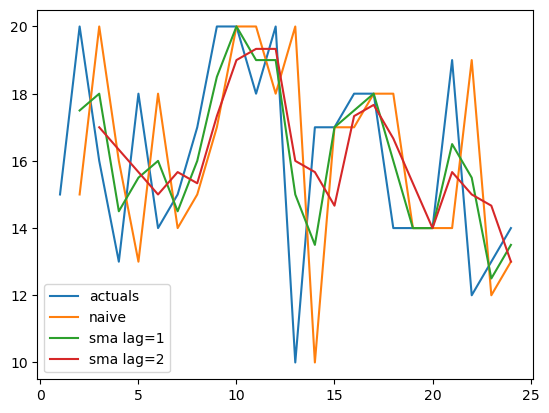

In [43]:
plt.plot(data.index, data['Products_sold_milllions'], label='actuals')
plt.plot(naive.index, naive['Products_sold_milllions'], label='naive')
plt.plot(sma.index, sma['Products_sold_milllions'], label='sma lag=1')
plt.plot(sma_2.index, sma_2['Products_sold_milllions'], label='sma lag=2')
plt.legend()
plt.show()